In [32]:
import matplotlib.pyplot
import pandas
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection

In [2]:
cancer = sklearn.datasets.load_breast_cancer()

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
columns = [
    '半径_平均', 'きめ_平均', '周長_平均', '面積_平均', 
    '平滑度_平均','コンパクト度_平均', '凹面_平均',
    '凹点_平均', '対称性_平均', 'フラクタル度_平均',
    '半径_標準誤差', 'きめ_標準誤差', '周長_標準誤差',
    '面積_標準誤差', '平滑度_標準誤差',
    'コンパクト度_標準誤差', '凹面_標準誤差', '凹点_標準誤差',
    '対称性_標準誤差', 'フラクタル度_標準誤差',
    '半径_最大', 'きめ_最大', '周長_最大', '面積_最大', 
    '平滑度_最大','コンパクト度_最大', '凹面_最大', '凹点_最大', 
    '対称性_最大', 'フラクタル度_最大'
]

In [10]:
df = pandas.DataFrame(cancer.data, columns=columns)

In [11]:
df

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,...,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
y = pandas.Series(cancer.target)

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

In [14]:
y.value_counts()

1    357
0    212
dtype: int64

In [15]:
akusei = df[y==0]
ryousei = df[y==1]

In [16]:
akusei

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,...,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [17]:
ryousei

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,...,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


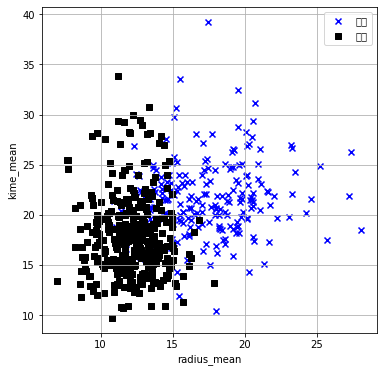

In [25]:
matplotlib.pyplot.figure(figsize=(6, 6))
matplotlib.pyplot.scatter(akusei['半径_平均'], akusei['きめ_平均'], marker='x', c='b', label='悪性')
matplotlib.pyplot.scatter(ryousei['半径_平均'], ryousei['きめ_平均'], marker='s', c='k', label='良性')
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('radius_mean')
matplotlib.pyplot.ylabel('kime_mean')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

In [26]:
input_columns = ['半径_平均', 'きめ_平均']
x = df[input_columns]
x

,半径_平均,きめ_平均
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [29]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=1)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [33]:
algorithm = sklearn.linear_model.LogisticRegression(random_state=1)

In [34]:
algorithm.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [37]:
y_pred = algorithm.predict(x_test)

In [39]:
score = algorithm.score(x_test, y_test)

In [40]:
score

0.8713450292397661